## 16.1 개념 정리
- 리덕스는 가장 많이 사용하는 리액트 상태 관리 라이브러리
- 컴포넌트의 상태 업데이트 관련 로직을 다른 파일로 분리시켜서 더욱 효율적으로 관리 간으
- 전역 상태를 관리할 때 효과적
1. 액션
- 상태에 변화가 필요하면 액션(action)이 발생
- 이는 하나의 객체로 표현된다. 액션 객체는 type 필드를 반드시 갖고 있어야 한다. 
- 그 외의 값들은 나중에 상태 업데이트를 할 때 참고해야 할 값이며, 작성자 마음대로 넣을 수 있다.
```js
{
  type: "ADOO_TODO",
  data: {
    id: 1,
    text: "리덕스 배우기"
  }
}
```
2. 액션 생성 함수
- 액션 생성 함수(action creator)는 액션 객체를 만들어주는 함수
- 어떤 변화를 일으켜야 할 때마다 액션 객체를 만들어야 하는데 실수를 방지하기 위해 함수로 만들어 관리
```js
function addTodo(data){
  return {
    type: "ADD_TODO",
    data
  };
}

const changeInput = text => ({
  type: "CHANGE_INPUT",
  text
});
```
3. 리듀서
- 리듀서(reducer)는 변화를 일으키는 함수
- 액션을 만들어서 발생시키면, 리듀서가 현재 상태와 전달받은 액션 객체를 파라미터로 받아온다. 
- 두 값을 참고하여 새로운 상태를 만들어서 반환해준다.
```js
const initialState = {
  counter: 1
};

function reducer(state=initialState, action){
  switch(action.type){
    case INCREMENT:
      return {
        counter: state.counter +1
      };
    default:
      return state;
  }
}
```
4. 스토어
- 프로젝트에 리덕스를 적용하기 위해 스토어(store)를 만든다. 
- 한 개의 프로젝트는 단 하나의 스토어만 가질 수 있다. 
- 스토어 안에는 현재 애플리케이션 상태와 리듀서가 들어있으며, 그 외에도 몇 가지 중요한 내장함수를 지닌다.

5. 디스패치
- 디스패치는 스토어의 내장 함수, '액션을 발생시키는 것'
- 이 함수는 dispatch(action)과 같은 형태로 액션 객체를 파라미터로 넣어서 호출. 
- 스토어는 리듀서 함수를 실행시켜 새로운 상태를 만들어 준다.

6. 구독
- 구독도 스토어의 내장 함수
- subscribe 함수 안에 리스너 함수를 파라미터로 넣어서 호출해주면, 이 리스너 함수가 액션이 디스패치되어 상태가 업데이트될 때마다 호출된다.
```js
const listener = () => {
  console.log('상태가 업데이트됨');
}
const unsubscribe = store.subscribe(listener);
unsubscribe(); // 추후 구독을 비활성화할 때 함수를 호출
```


## 16.2 리액트 없이 쓰는 리덕스
- 리덕스는 리액트에 종속되는 라이브러리가 아니다
- 다른 UI 라이브러리 / 프레임 워크와 함께 사용 가능
- 바닐라 자바스크립트와 함께 사용 가능
1. parcel로 프로젝트 만들기
    - $ yarn global add parcel-bundler
    - $ mkdir vanila-redux
    - $ yarn init -y
    ```html
    <html>
        <body>
            <div>바닐라 자바스크립트</div>
            <script src="./index.js"></script>
        </body>
    </html>
    ``` 
    ```js
    console.log('hello')
    ```
    - $ parcel index.html

        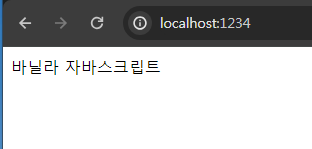

2. 간단한 UI 구성하기
```html
<html>
  <head>
    <link rel="stylesheet" type="text/css" href="index.css" />
  </head>
  <body>
    <div class="toggle"></div>
    <hr />
    <h1>0</h1>
    <button id="increase">+1</button>
    <button id="decrease">-1</button>
    <script src="./index.js"></script>
  </body>
</html>
```
```css
.toggle {
    border: 2px solid black;
    width: 64px;
    height: 64px;
    border-radius: 32px;
    box-sizing: border-box;
}
  
.toggle.active {
    background: yellow;
}
```

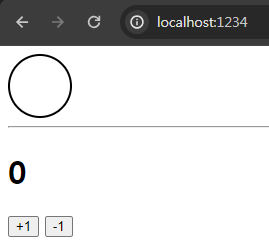

3. DOM 레퍼런스 만들기
```js
const divToggle = document.querySelector(".toggle");
const counter = document.querySelector("h1");
const btnIncrease = document.querySelector("#increase");
const btnDecrease = document.querySelector("#decrease");
```

4. 액션 타임과 액션 생성 함수 정의
```js
const divToggle = document.querySelector(".toggle");
const counter = document.querySelector("h1");
const btnIncrease = document.querySelector("#increase");
const btnDecrease = document.querySelector("#decrease");

const TOGGLE_SWITCH = "TOGGLE_SWITCH";
const INCREASE = "INCREASE";
const DECREASE = "DECREASE";

const toggleSwtich = () => ({ type: TOGGLE_SWITCH });
const increase = (difference) => ({ type: INCREASE, difference });
const decrease = () => ({ type: DECREASE });
```

5. 초기값 설정
- 초기값의 형태는 자유, 숫자, 문자열, 객체 일 수도 있다.
```js
const divToggle = document.querySelector(".toggle");
const counter = document.querySelector("h1");
const btnIncrease = document.querySelector("#increase");
const btnDecrease = document.querySelector("#decrease");

const TOGGLE_SWITCH = "TOGGLE_SWITCH";
const INCREASE = "INCREASE";
const DECREASE = "DECREASE";

const toggleSwtich = () => ({ type: TOGGLE_SWITCH });
const increase = (difference) => ({ type: INCREASE, difference });
const decrease = () => ({ type: DECREASE });

const initalState = {
    toggle: false,
    counter: 0,
};
```

6. 리듀서 함수 정의
- 리듀서는 변화를 일으키는 함수, state와 action 값을 받아온다.
```js
const divToggle = document.querySelector(".toggle");
const counter = document.querySelector("h1");
const btnIncrease = document.querySelector("#increase");
const btnDecrease = document.querySelector("#decrease");

const TOGGLE_SWITCH = "TOGGLE_SWITCH";
const INCREASE = "INCREASE";
const DECREASE = "DECREASE";

const toggleSwtich = () => ({ type: TOGGLE_SWITCH });
const increase = (difference) => ({ type: INCREASE, difference });
const decrease = () => ({ type: DECREASE });

const initalState = {
    toggle: false,
    counter: 0,
};

// state가 undefined일 때는 initialState를 기본 값으로 사용
function reducer(state = initialState, action) {
    // action.type에 따라 다른 작업을 처리
    switch (action.type) {
        case TOGGLE_SWITCH:
            return {
                // 불변성 유지
                ...state,
                toggle: !state.toggle
            };
        case INCREASE:
            return {
                ...state,
                counter: state.counter + action.difference
            };
        case DECREASE:
            return {
                ...state,
                counter: state.counter - 1
            };
        default:
            return state;
    }
}
```

7. 스토어 만들기
- 스토어를 만들 때는 createStore함수를 사용
-  이 함수를 사용하려면 리덕스에서 createStore를 임포트, 함수의 파라미터에는 리듀서 함수를 넣어줘야 한다.
```js
//index.js
import { createStore } from 'redux';
(...)
const store = createStore(reducer)
```

8. render 함수 만들기
- render 함수는 상태가 업데이트될 때마다 호출되며, 리액트의 render 함수와는 다르게 이미 html을 사용하여 만들어진 UI의 속성을 상태에 따라 변경
```js
(...)
const store = createStore(reducer);

const render = () => {
    // 현재 상태를 불러온다.
    const state = store.getState(); 
    if (state.toggle) {
        divToggle.classList.add("active");
    } else {
        divToggle.classList.remove("active");
    }
    // 카운터 처리
    counter.innerText = state.counter;
};
  
render();
```

9. 구독하기
- 스토어 상태가 바뀔 때마다 방금 만든 render 함수가 호출되도록 해줄 것
- 이 작업은 스토어의 내장 함수 subscribe를 사용하여 수행 가능
- subscribe 함수의 파라미터로는 함수 형태의 값을 전달. 전달된 함수는 추후 액션이 발생하여 상태가 업데이트될때마다 호출
- 이번 프로젝트에서는 subscribe 함수를 직접사용하지만 추후 리액트 프로젝트에서 리덕스를 사용할 때는 이 함수를 직접 사용하지 않을 것입니다. 왜냐하면 컴포넌트에서 리덕스 상태를 조호하는 과정에서 react-redux라는 라이브러리가 이 작업을 대신해주기 때문
```js
(...)
render();
store.subscribe(render);
```

10. 액션 발생시키기
- 디스패치 : 액션을 발생시키는 것
- 스토어의 내장 함수 dispatch 사용, 파라미터는 액션 객체를 넣어준다.
```js
(...)
store.subscribe(render);

divToggle.onclick = () => {
    store.dispatch(toggleSwtich())
}
btnIncrease.onclick = () => {
    store.dispatch(increase(1))
}
btnDecrease.onclick = () => {
    store.dispatch(decrease())
}
```

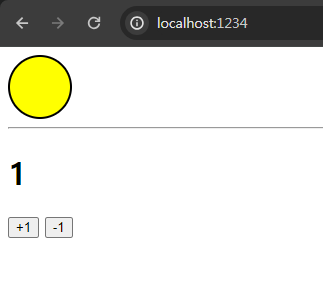



## 16.3 리덕스의 세 가지 규칙
1. 단일 스토어
- 하나의 애플리케이션 안에는 하나의 스토어가 들어가 있다.
- 사실 여러 개의 스토어를 사용하는 것이 완전히 불가능하지는 않다.
- 특정 업데이트가 너무 빈번하게 일어나거나 애플리케이션의 특정 부분을 완전히 분리시킬 때 여러 개의 스토어를 만들 수도 있지만, 상태 관리가 복잡해질 수 있으므로 권장하지 않는다.

2. 읽기 전용 상태
- 리덕스 상태는 읽기 전용
- 기존에 리액트에서 setState를 사용하거나 state를 업데이트할 때도 객체나 배열을 업데이트하는 과정에서 불변성을 지켜주기 위해 spread 연산자를 사용하거나 imer와 같은 불변성 관리 라이브러리를 사용
- 리덕스도 마찬가지, 상태를 업데이트할 때 기존의 객체는 건드리지 않고 새로운 객체를 생성해줘야 한다.
- 리덕스에서 불변성을 유지해야 하는 이유는 내부적으로 데이터가 변경되는 것을 감지하기 위해 얕은 비교 검사를 하기 때문
- 객체의 변화를 감지할 때 객체의 깊숙한 안쪽까지 비교하는 것이 아니라 겉핥기 식으로 비교하여 좋은 성능을 유지할 수 있는 것

3. 리듀서는 순수한 함수
- 변화를 일으키는 리듀서 함수는 순수한 함수여야 한다. 
    - 리듀서 함수는 이전 상태와 액션 객체를 파라미터로 받는다.
    - 파라미터 외의 값에는 의존하면 안 된다.
    - 이전 상태는 절대로 건드리지 않고, 변화를 준 새로운 상태 객체를 만들어서 반환한다.
    - 똑같은 파라미터로 호출된 리듀서 함수는 언제나 똑같은 결과 값을 반환해야 한다.